# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aulia Halimatusyaddiah MC319D5X2048
- **Email:** mc319d5x2048@student.devacademy.id
- **ID Dicoding:** auliahalmtsydh

## Menentukan Pertanyaan Bisnis

- Mulai 2011-2012 pada saat kapan waktu penggunaan sepeda terbanyak per harinya?
- Kondisi hari seperti apa yang menyebabkan lonjakan penggunaan sepeda tersebut?
- Apakah faktor cuaca tidak mempengaruhi tingginya angka penggunaan sepeda pada kondisi hari tersebut?
- Pada saat kapan peminat sepeda casual lebih banyak daripada registered? 

## Import Semua Packages/Library yang Digunakan

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Data Wrangling

### Gathering Data

In [192]:
data = pd.read_csv('data/day.csv')
bike_data = pd.DataFrame(data)
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**<br>
Untuk proses analisis data kali ini, hanya dibutuhkan satu dataset dengan cakupan rekam data harian untuk menjawab pertanyaan yang telah diajukan sebelumnya. Dataset Bike Sharing of The Day sudah diinput ke dalam file ipynb dalam bentuk csv yang diformat ke dalam dataframe yang akan digunakan untuk memperoleh insight dari hasil analisis.

### Assessing Data

In [193]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**<br>
Kolom <code>dteday</code> yang berisi keterangan date of the day harusnya bertipe <code>date</code> bukan <code>object</code>, maka dari itu kita harus mengubah tipe data pada kolom dteday untuk mempermudah proses analisis time series.

In [194]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**<br>
Tidak terdapat NaN atau missing value pada data frame harian peminjaman sepeda

In [195]:
print("Jumlah duplikasi: ", bike_data.duplicated().sum())

Jumlah duplikasi:  0


**insight:**<br>
Tidak terdapat duplikasi pada data frame harian peminjaman sepeda

C:\Users\USER\AppData\Local\Temp\ipykernel_10056\1390498105.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=bike_data[col], palette="coolwarm")
C:\Users\USER\AppData\Local\Temp\ipykernel_10056\1390498105.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=bike_data[col], palette="coolwarm")
C:\Users\USER\AppData\Local\Temp\ipykernel_10056\1390498105.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=bike_data[col], palette="coolwarm")
C:\Users\USER\AppData\Local\Temp\ipykernel_10056\1390498105.py:8: FutureWarning: 

Passing `palet

C:\Users\USER\AppData\Local\Temp\ipykernel_10056\1390498105.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=bike_data[col], palette="coolwarm")
C:\Users\USER\AppData\Local\Temp\ipykernel_10056\1390498105.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=bike_data[col], palette="coolwarm")
C:\Users\USER\AppData\Local\Temp\ipykernel_10056\1390498105.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=bike_data[col], palette="coolwarm")
C:\Users\USER\AppData\Local\Temp\ipykernel_10056\1390498105.py:8: FutureWarning: 

Passing `palet

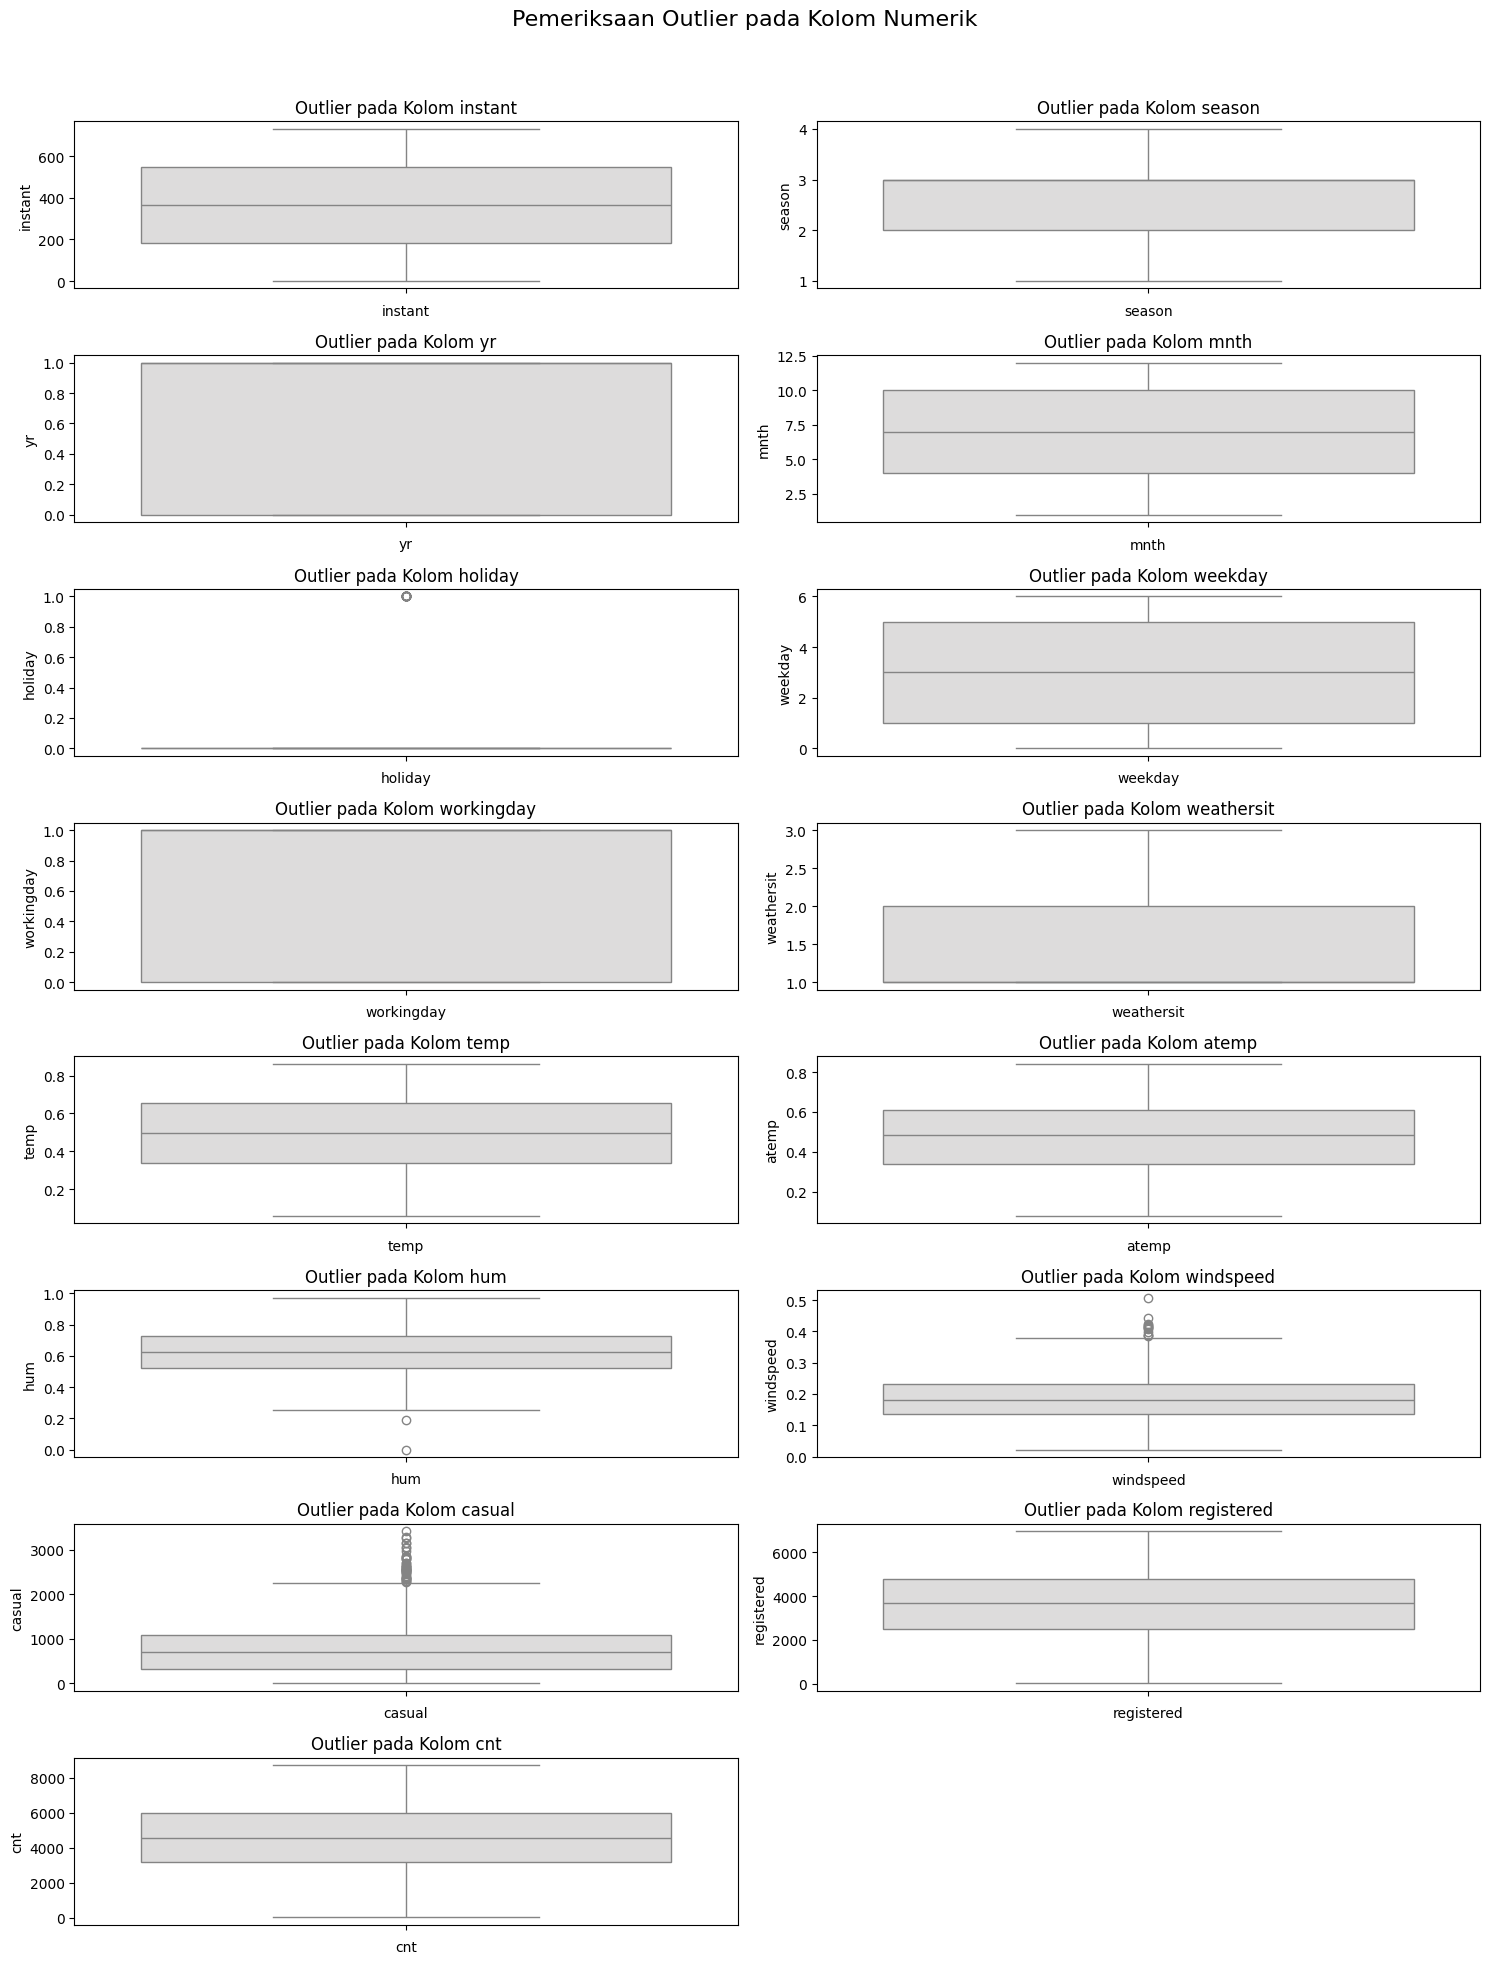

In [196]:
numerical_columns = bike_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 20))
plt.suptitle("Pemeriksaan Outlier pada Kolom Numerik", fontsize=16)

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//2 + 1, 2, i)
    sns.boxplot(y=bike_data[col], palette="coolwarm")
    plt.title(f"Outlier pada Kolom {col}")
    plt.xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Insight:**
<br>Outlier tidak perlu dihapus karena data memang mencerminkan kejadian nyata. Misalnya, kelembaban yang sangat rendah atau angin yang sangat kencang bisa saja terjadi secara alami. Kemungkinan peminjaman sepeda secara casual bisa meningkat saat ada event tertentu di luar kepentingan primer.

In [197]:
check_calculate = bike_data
check_calculate['calculate_cnt'] = bike_data['casual'] + bike_data['registered']
check_calculate['is_cnt_correct'] = bike_data['cnt'] == check_calculate['calculate_cnt']

print(check_calculate[['cnt', 'casual', 'registered', 'calculate_cnt', 'is_cnt_correct']])


      cnt  casual  registered  calculate_cnt  is_cnt_correct
0     985     331         654            985            True
1     801     131         670            801            True
2    1349     120        1229           1349            True
3    1562     108        1454           1562            True
4    1600      82        1518           1600            True
..    ...     ...         ...            ...             ...
726  2114     247        1867           2114            True
727  3095     644        2451           3095            True
728  1341     159        1182           1341            True
729  1796     364        1432           1796            True
730  2729     439        2290           2729            True

[731 rows x 5 columns]


**Insight:**<br>
Memeriksa kolom <code>cnt</code> memang merupakan hasil penjumlahan dari kolom <code>casual</code> dan <code>registered</code>. Didapat hasil "TRUE" bahwa kolom cnt memang merupakan hasil penjumlahan dari kolom casual dengan kolom registered.

In [198]:
bike_data.drop(columns=['calculate_cnt', 'is_cnt_correct'], inplace=True)

In [199]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**<br>
Tidak ada keanehan dari masing-masing elemen pendeskripsian dataset.

### Cleaning Data

In [200]:
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [201]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**</br>
Sekarang semua tipe data dari setiap feature sudah sesuai dan tidak perlu tindakan normalisasi dari data 


## Exploratory Data Analysis (EDA)

### Explore ...

In [202]:
bike_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [203]:
bike_data.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


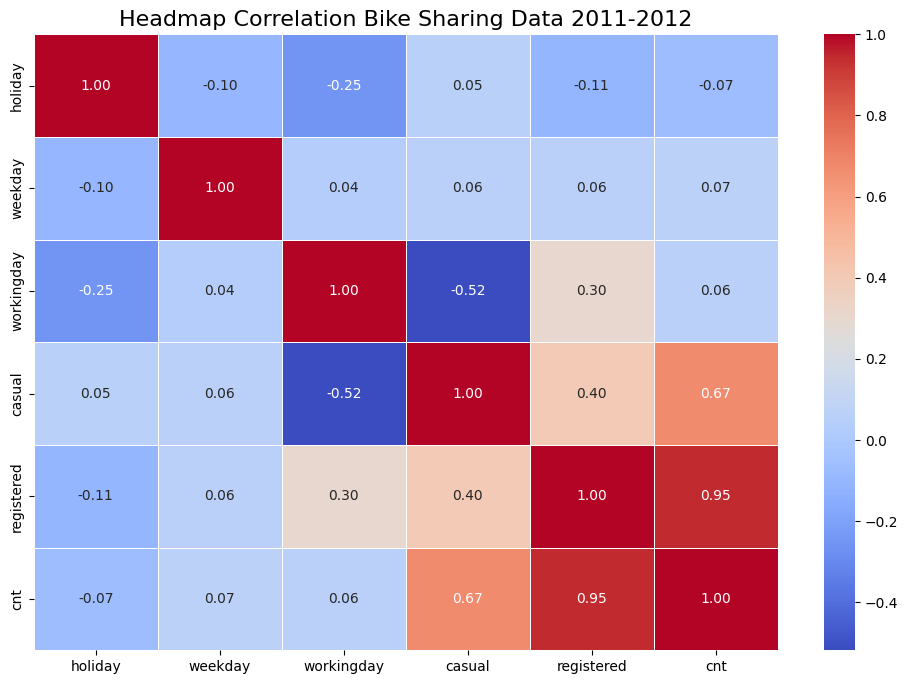

In [204]:
cols = ['holiday', 'weekday', 'workingday', 'casual', 'registered', 'cnt']

corr_matrix = bike_data[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Headmap Correlation Bike Sharing Data 2011-2012', fontsize=16)
plt.show()

**Insight:**<br>
- Kolom <code>holiday</code> memiliki korelasi dengan kolom <code>casual</code>, namun tidak berkorelasi dengan kolom <code>registered</code> sehingga menyebabkan rendahnya korelasi antara kolom <code>holiday</code> dengan kolom <code>cnt</code> yang merupakan hasil penjumlahan nilai dari kolom casual dan registered. Hal ini mengakibatkan korelasi antara kolom <code>holiday</code> dengan kolom <code>cnt</code> *sedikit* tidak memiliki relasi.
- Kolom weekday memiliki korelasi dengan kolom <code>casual</code>, <code>registered</code>, dan kolom <code>cnt</code>
- Kolom workingday memiliki korelasi dengan kolom <code>casual</code>, <code>registered</code>, dan kolom <code>cnt</code>

In [205]:
base_on_date = bike_data[['dteday', 'casual', 'registered', 'cnt']].sort_values(by='cnt', ascending=False).head(10)

print(base_on_date)

        dteday  casual  registered   cnt
623 2012-09-15    3160        5554  8714
637 2012-09-29    2589        5966  8555
630 2012-09-22    2512        5883  8395
447 2012-03-23    2469        5893  8362
504 2012-05-19    3410        4884  8294
617 2012-09-09    2570        5657  8227
571 2012-07-25    1383        6790  8173
629 2012-09-21    1250        6917  8167
643 2012-10-05    1516        6640  8156
518 2012-06-02    2795        5325  8120


**Menganalisis hari terbanyak penggunaan sepeda secara casual maupun registered (contoh hanya 10 hari terbanyak)**

In [206]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
bike_data['season'] = bike_data['season'].map(season_mapping)

**Melakukan mapping pada kolom season agar mempermudah dalam menganalisis tipe musim**

In [207]:
base_on_season = bike_data[['dteday', 'season', 'cnt']].sort_values(by='cnt', ascending=False).head(10)

print(base_on_season)


        dteday  season   cnt
623 2012-09-15    Fall  8714
637 2012-09-29  Winter  8555
630 2012-09-22    Fall  8395
447 2012-03-23  Summer  8362
504 2012-05-19  Summer  8294
617 2012-09-09    Fall  8227
571 2012-07-25    Fall  8173
629 2012-09-21    Fall  8167
643 2012-10-05  Winter  8156
518 2012-06-02  Summer  8120


In [208]:
season_counts = bike_data.groupby('season')['cnt'].sum().reset_index()

print(season_counts)


   season      cnt
0    Fall  1061129
1  Spring   471348
2  Summer   918589
3  Winter   841613


**Insight:**
Menganalisis hari terbanyak penggunaan sepeda berdasarkan musim pada hari itu (contoh hanya 10 hari terbanyak)<br> Didapat bahwa penggunaan sepeda terbanyak adalah pada saat musim gugur

In [209]:
casual = bike_data.groupby(['season', 'weekday', 'workingday', 'holiday'])['casual'].sum().reset_index()

casual_sorted = casual.sort_values(by='casual', ascending=False)

print(casual_sorted.head(10))  

    season  weekday  workingday  holiday  casual
8     Fall        6           0        0   51464
26  Summer        6           0        0   51375
18  Summer        0           0        0   48372
0     Fall        0           0        0   47053
36  Winter        6           0        0   35208
27  Winter        0           0        0   30646
7     Fall        5           1        0   28114
25  Summer        5           1        0   25364
6     Fall        4           1        0   23973
3     Fall        2           1        0   23371


**Insight:**
- Penggunaan sepeda secara casual lebih diminati ketika <b>weekday</b> dan <b>working day</b> ketika cuaca sedang <b>fall</b> dan <b>summer</b>

   season      temp     atemp       hum  windspeed
0    Fall  0.706309  0.655898  0.633482   0.172095
1  Spring  0.297748  0.296914  0.582903   0.214537
2  Summer  0.544405  0.520307  0.626948   0.203507
3  Winter  0.422906  0.415539  0.668719   0.171995


C:\Users\USER\AppData\Local\Temp\ipykernel_10056\4180167483.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="temp", data=bike_data, palette="coolwarm", ax=axes[0, 0])
C:\Users\USER\AppData\Local\Temp\ipykernel_10056\4180167483.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="atemp", data=bike_data, palette="coolwarm", ax=axes[0, 1])


C:\Users\USER\AppData\Local\Temp\ipykernel_10056\4180167483.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="hum", data=bike_data, palette="coolwarm", ax=axes[1, 0])
C:\Users\USER\AppData\Local\Temp\ipykernel_10056\4180167483.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="windspeed", data=bike_data, palette="coolwarm", ax=axes[1, 1])


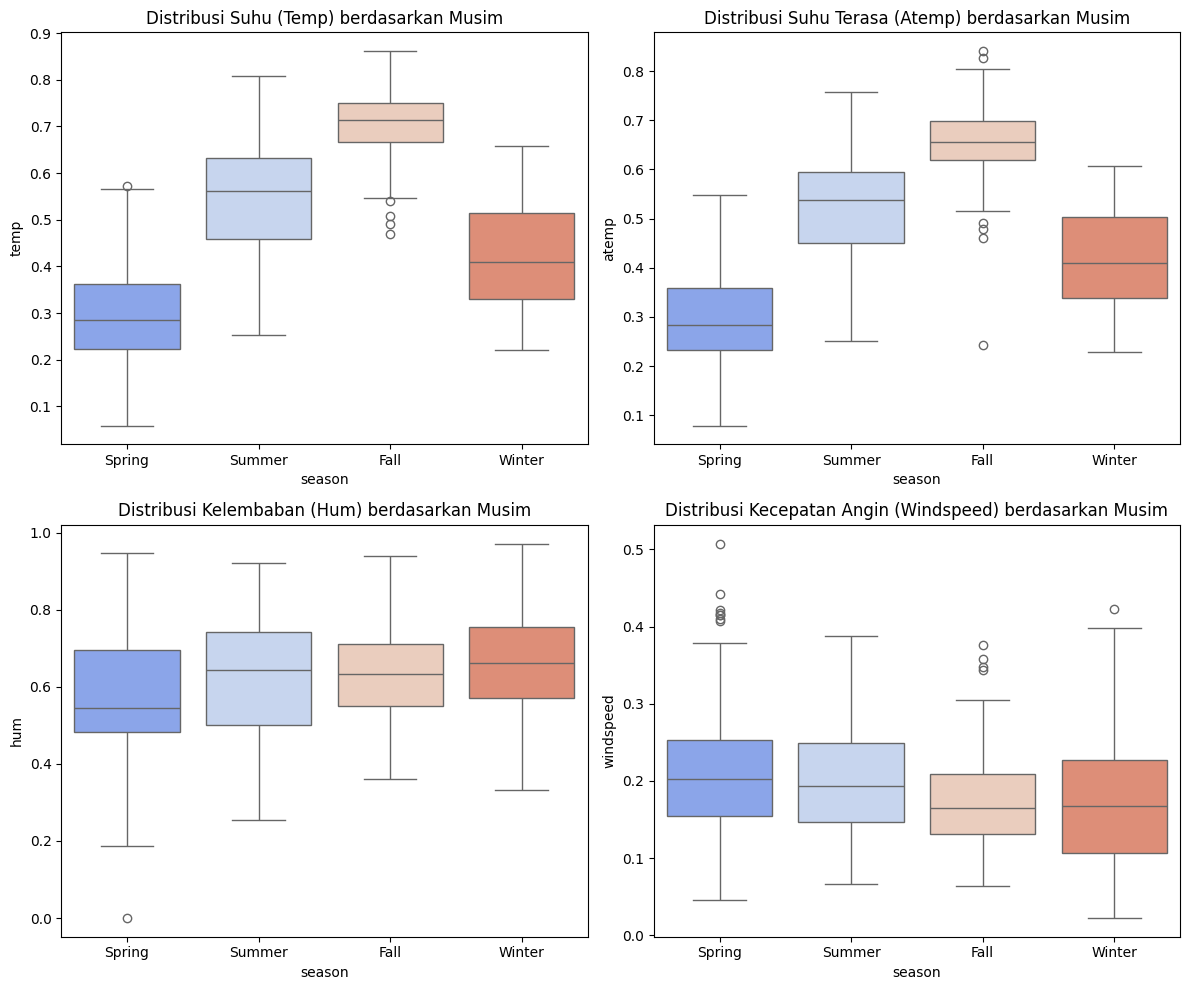

In [210]:
season_weather = bike_data.groupby("season")[["temp", "atemp", "hum", "windspeed"]].mean().reset_index()
print(season_weather)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x="season", y="temp", data=bike_data, palette="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title("Distribusi Suhu (Temp) berdasarkan Musim")

sns.boxplot(x="season", y="atemp", data=bike_data, palette="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title("Distribusi Suhu Terasa (Atemp) berdasarkan Musim")

sns.boxplot(x="season", y="hum", data=bike_data, palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("Distribusi Kelembaban (Hum) berdasarkan Musim")

sns.boxplot(x="season", y="windspeed", data=bike_data, palette="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Distribusi Kecepatan Angin (Windspeed) berdasarkan Musim")

plt.tight_layout()
plt.show()

**Insight:**<br>
Berdasarkan distribusi temp, atemp, hum, dan windspeed dapat diketahui bahwa Spring adalah musim yang paling jarang diminati untuk naik sepeda karena kondisinya yang berangin dan dingin.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Mulai 2011-2012 pada saat kapan waktu penggunaan sepeda terbanyak per harinya?

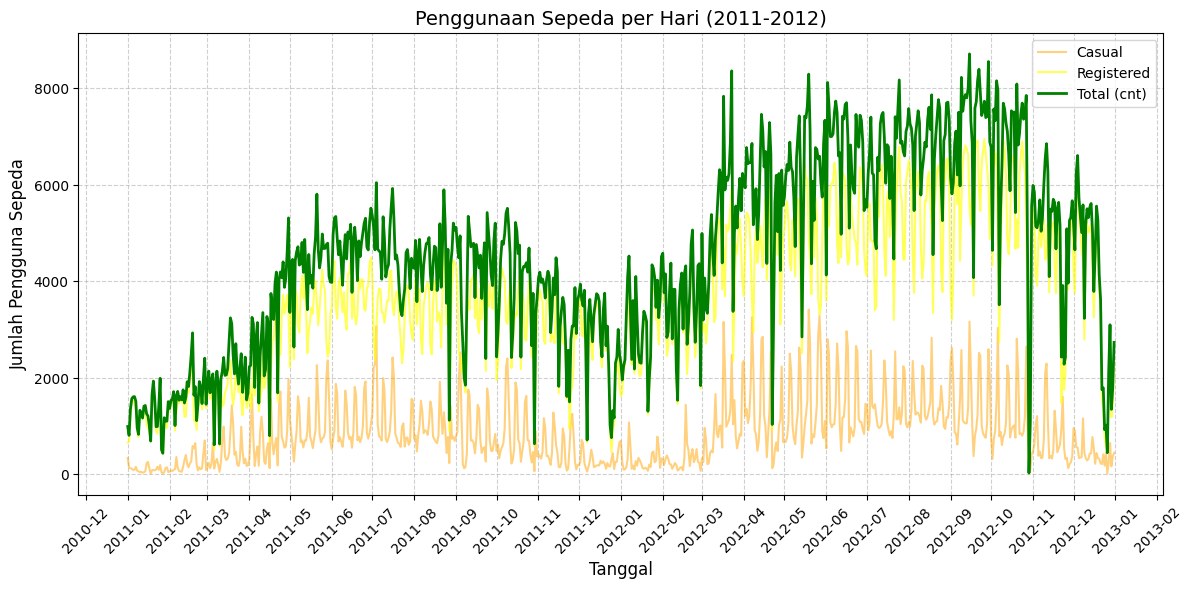

In [211]:
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])

plt.figure(figsize=(14, 6))


sns.lineplot(data=bike_data, x='dteday', y='casual', label='Casual', color='orange', alpha=0.5)
sns.lineplot(data=bike_data, x='dteday', y='registered', label='Registered', color='yellow', alpha=0.65)
sns.lineplot(data=bike_data, x='dteday', y='cnt', label='Total (cnt)', color='green', linewidth=2)

plt.title('Penggunaan Sepeda per Hari (2011-2012)', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=12)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  


plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


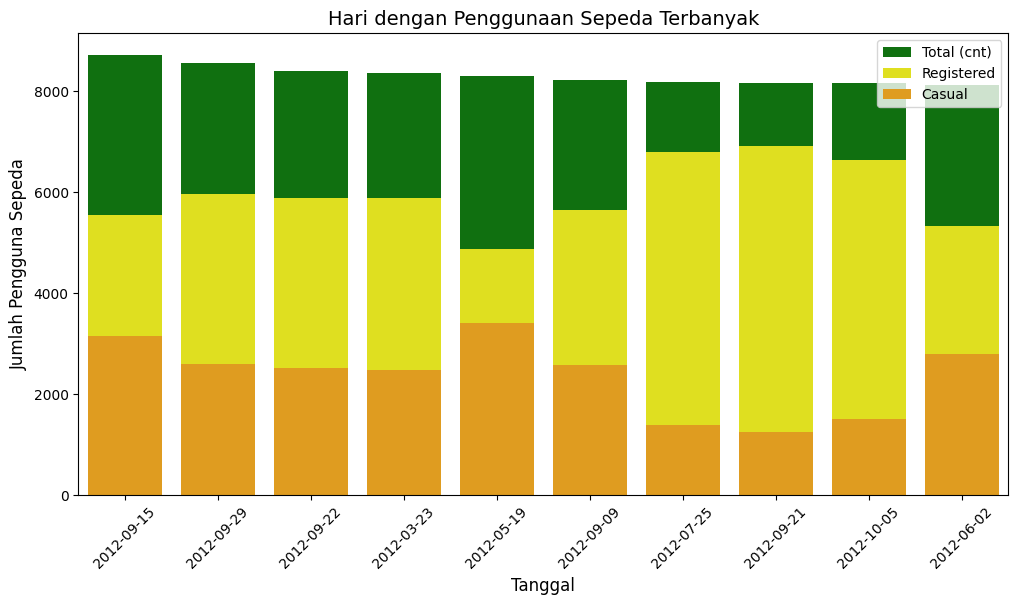

In [212]:
plt.figure(figsize=(12, 6))
sns.barplot(data=base_on_date, x='dteday', y='cnt', color='green', label='Total (cnt)')
sns.barplot(data=base_on_date, x='dteday', y='registered', color='yellow', label='Registered')
sns.barplot(data=base_on_date, x='dteday', y='casual', color='orange', label='Casual')

plt.title('Hari dengan Penggunaan Sepeda Terbanyak', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=12)
plt.xticks(rotation=45)

plt.legend()

plt.show()


**Insight:**
Berdasarkan hasil EDA dan visualisasi didapat kesimpulan bahwa penggunaan sepeda terbanyak adalah pada bulan September, Maret, Mei, Juli, Oktober, dan juni 2012.<br> Tepatnya pada 2012-09-15, 2012-09-29, 2012-09-22, 2012-03-23, 2012-05-19, 2012-09-09, 2012-07-25, 2012-09-21, 2012-10-05, 2012-06-02

### Pertanyaan 2: Kondisi hari seperti apa yang menyebabkan lonjakan penggunaan sepeda tersebut?

C:\Users\USER\AppData\Local\Temp\ipykernel_10056\3272826631.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=bike_usage_melted, x='weekday', y='Total', hue='Type', palette=palette, ax=axes[0], ci=None)
C:\Users\USER\AppData\Local\Temp\ipykernel_10056\3272826631.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=bike_usage_melted, x='workingday', y='Total', hue='Type', palette=palette, ax=axes[1], ci=None)
C:\Users\USER\AppData\Local\Temp\ipykernel_10056\3272826631.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Non-Workingday', 'Workingday'])
C:\Users\USER\AppData\Local\Temp\ipykernel_10056\3272826631.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=bike_usage_melted, 

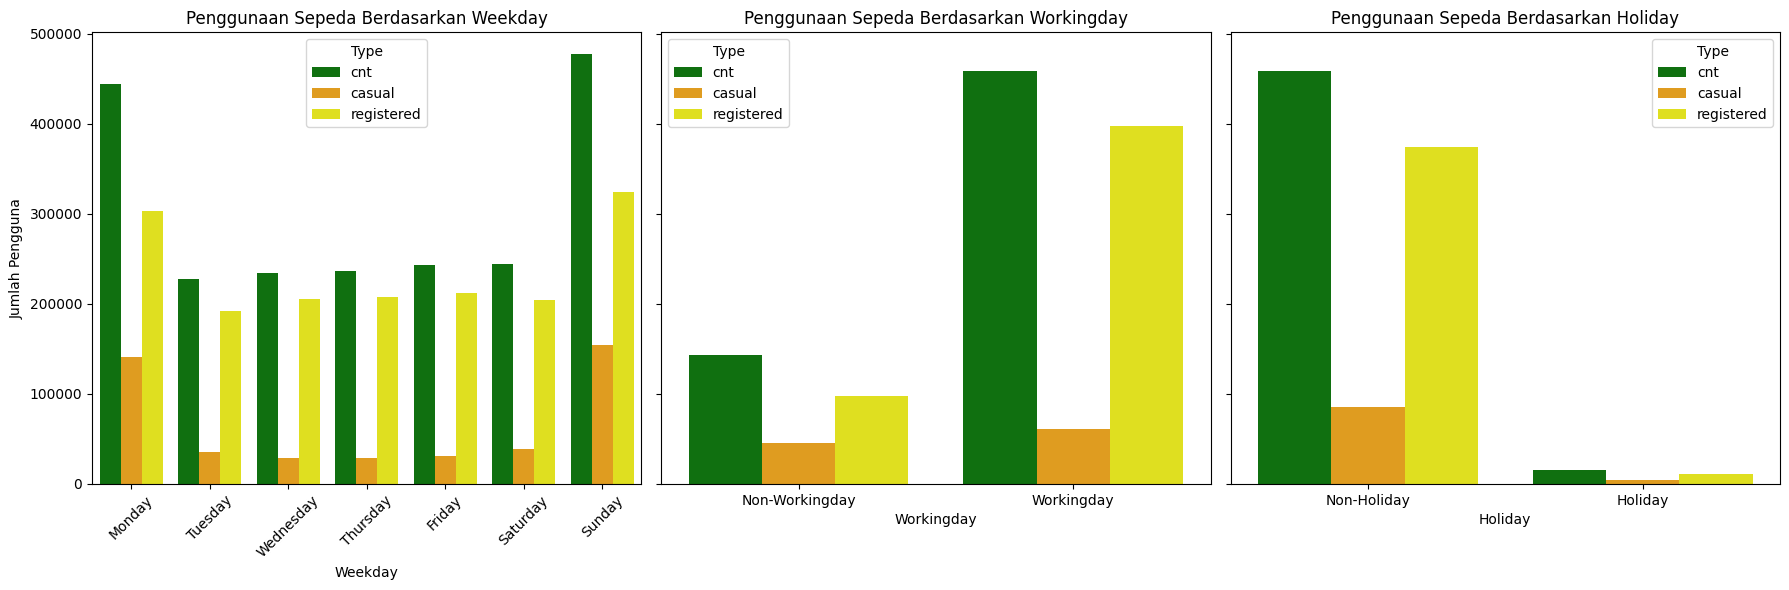

In [213]:
bike_usage = bike_data.groupby(['weekday', 'workingday', 'holiday'])[['cnt', 'casual', 'registered']].sum().reset_index()

weekday_mapping = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 
    4: "Friday", 5: "Saturday", 6: "Sunday"
}
bike_usage['weekday'] = bike_usage['weekday'].map(weekday_mapping)

bike_usage_melted = bike_usage.melt(id_vars=['weekday', 'workingday', 'holiday'], 
                                    value_vars=['cnt', 'casual', 'registered'], 
                                    var_name='Type', value_name='Total')

palette = {'cnt': 'green', 'casual': 'orange', 'registered': 'yellow'}
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(data=bike_usage_melted, x='weekday', y='Total', hue='Type', palette=palette, ax=axes[0], ci=None)
axes[0].set_title('Penggunaan Sepeda Berdasarkan Weekday')
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Jumlah Pengguna')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=bike_usage_melted, x='workingday', y='Total', hue='Type', palette=palette, ax=axes[1], ci=None)
axes[1].set_title('Penggunaan Sepeda Berdasarkan Workingday')
axes[1].set_xlabel('Workingday')
axes[1].set_xticklabels(['Non-Workingday', 'Workingday'])

sns.barplot(data=bike_usage_melted, x='holiday', y='Total', hue='Type', palette=palette, ax=axes[2], ci=None)
axes[2].set_title('Penggunaan Sepeda Berdasarkan Holiday')
axes[2].set_xlabel('Holiday')
axes[2].set_xticklabels(['Non-Holiday', 'Holiday'])

handles, labels = axes[0].get_legend_handles_labels()
plt.tight_layout()
plt.show()


**Insight:**<br>
Penggunaan sepeda terbanyak adalah pada saat kondisi hari berkerja yaitu weekday khususnya pada senin sebagai working day dan sabtu sebagai weekend namun bukan holiday.

### Pertanyaan 3: Apakah faktor cuaca tidak mempengaruhi tingginya angka penggunaan sepeda pada kondisi hari tersebut?

C:\Users\USER\AppData\Local\Temp\ipykernel_10056\1506335077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=bike_data["season"], y=bike_data["cnt"], palette="coolwarm")


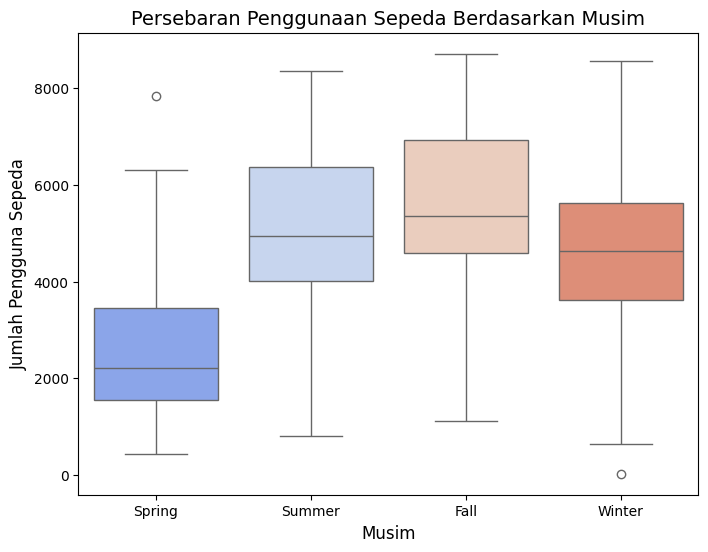

In [214]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=bike_data["season"], y=bike_data["cnt"], palette="coolwarm")

plt.title("Persebaran Penggunaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Pengguna Sepeda", fontsize=12)

plt.show()


**Insight:**
Penggunaan sepeda banyak dipakai rata-rata pada saat summer dan fall dikarenakan suhu lingkungan, suhu perasaan, dan kelembapan normal. Angin tidak terlalu kencang sehingga cocok untuk bersepeda

### Pertanyaan 4: Pada saat kapan peminat sepeda casual lebih banyak daripada registered? 

C:\Users\USER\AppData\Local\Temp\ipykernel_10056\3701030357.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=casual_sorted, x="weekday", y="casual", hue="season", palette="Set2", ci=None)


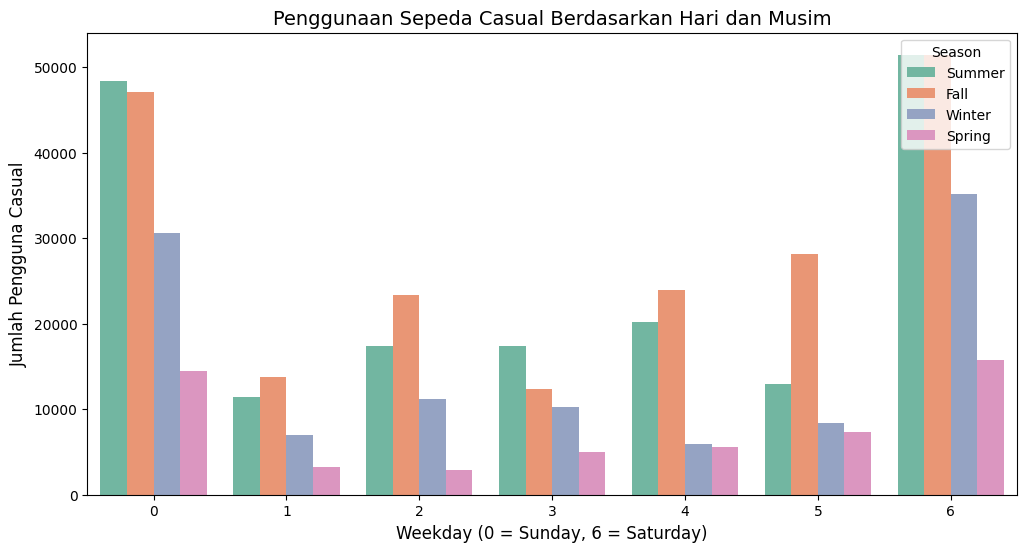

In [215]:
plt.figure(figsize=(12, 6))
sns.barplot(data=casual_sorted, x="weekday", y="casual", hue="season", palette="Set2", ci=None)

plt.title("Penggunaan Sepeda Casual Berdasarkan Hari dan Musim", fontsize=14)
plt.xlabel("Weekday (0 = Sunday, 6 = Saturday)", fontsize=12)
plt.ylabel("Jumlah Pengguna Casual", fontsize=12)
plt.legend(title="Season", loc="upper right")

plt.show()


**Insight:**
Berdasarkan data dapat dilihat bahwa orang lebih memilih menggunakan sepeda secara <b>casual</b> pada weekend yaitu <b>Sabtu</b> dan <b>Minggu</b> pada musim <b>Summer</b> dan <b>Winter</b>.

## Conclusion

Menurut data peminjaman sepeda mulai dari 2011 - 2012, lonjakan penggunaan sepeda secara casual maupun registered terjadi pada tahun 2012 tepatnya pada bulan September, Maret, Mei, Juli, Oktober, dan juni. Banyaknya penggunaan sepeda ini terjadi pada workingday khususnya pada hari senin dan pada weekend yaitu hari sabtu. Peminat peminjaman sepeda pada hari libur sangatlah rendah karena sedikitnya aktivitas di luar rumah dibandingkan workingday. Selain itu, faktor cuaca juga mempengaruhi penggunaan sepeda seperti suhu lingkungan, suhu perasaan, kelembapan, dan kecepatan angin. Banyak orang menggunakan sepeda pada musim summer dan fall karena kondisi lingkungan sesuai dengan suhu tubuh, tidak dingin, dan tidak ada angin kencang. Di sisi lain, pengguna yang tidak teregistrasi atau secara casual banyak dijumpai pada saat weekday yaitu Minggu dan Sabtu karena pada hari itu biasanya orang memakai sepeda untuk kebutuhan yang tidak pasti atau suatu event weekend.

In [216]:
bike_data.to_csv("data/all_data.csv", index=False)